<a href="https://colab.research.google.com/github/liao771018/tibame-DL/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# tensorflow 2:
# a. keras已經是一份子
# b. gpu會直接辨別(cuda/cudnn還是要裝), 不需要安裝tensorflow-gpu
# c. eager mode(不用起tf.session就可以測試圖)
from tensorflow.keras.datasets.mnist import load_data
load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

# 印出 load_data() 看資料組成方式
# ((x_train, y_train), (x_test, y_test))  # class: numpy
(x_train, y_train), (x_test, y_test) = load_data()

# 列出有多少數量
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# output
# (60000, 28, 28)
# (60000,)
# (10000, 28, 28)
# (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


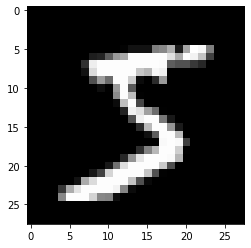

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 顯示圖片
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要把色調反過來, 在 cmap 的後面加 _r 
# cmap="YlOrRd_r"
plt.imshow(x_train[0], cmap="gray")

# 顯示圖片色彩值的表格
# 調整最大可視欄列數
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.DataFrame(x_train[0])

In [ ]:
# 建立模型

# keras有兩種建立模型的方式
# a. Sequential: 一層疊再一層的上面(限制比較大)
# b. Model: 每一層可以是任何形式去做(自由)
from tensorflow.keras.models import Sequential

# Dense(全連接層 Fully-Connected)
from tensorflow.keras.layers import Dense

# 準備一個 list 放所有連接層(layers)， activation=連接層的種類
# units= 這一層要的神經元個數，放在第一個參數
# bias 把激活函數的"激活點"偏移到原點 (統一標準) ， 一個 unit 就有 1 個 bias
# 先隨機給 bias 一個常數，再用偏微分去調整這個常數，讓 Loss 達到 min
layers = [
    # Param 728 * 128 + 128(bias) = 100480
    Dense(256, activation="relu", input_dim=784), # 只有第一層要給 input_dim 輸入層的數量 28*28
    # Param 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")  # softmax 是 normal 後的 sigmoid (僅適用互斥) * 非互斥要用 sigmoid
]

model = Sequential(layers) # 建立模型的物件
model.summary() # 摘要


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 選擇損失函式 Loss
# 輸出一個神經元(二元分類): BinaryCrossEntropy p*log(1/q) + (1-p)*log(1/1-q)
# 輸出多個神經元: CategoricalCrossEntropy p1*log(1/q1) + p2*log(1/q2)......

# 選擇優化法 optimizer
# Adam 綜合兩種優化法

# 選擇評估方法 metrics
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])


In [ ]:
# 針對 y 做處理: 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 因為沒有大小關係，每一個答案做 One-Hot-Encoding 
# num_classes=全部的答案有多少個
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("before:", y_train[0])
print('after:', y_train_cat[0])

before: 5
after: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Flatten (reshape) 展開 (image to a vector)
# 每一個函式庫都有假定的輸入範圍，通常為 0-1 或 (-1)-1
# 針對 x 做展開: 28 * 28 -> 784(numpy reshape)
# reshape(60000, 784) == reshape(-1, 784) == reshape(60000, -1)
x_train_norm = x_train.reshape(-1, 784) / 255.0  # 輸入改成 0-1之間
x_test_norm = x_test.reshape(-1, 784) / 255.0   # 有些numpy函示庫會用整數除法，所以加 .0 強製作小數除法

print("before:", x_train.shape)
print("after:", x_train_norm.shape)

before: (60000, 28, 28)
after: (60000, 784)


In [ ]:
# 開始訓練模型

# ModelCheckpoint: 儲存模型, 副檔名 .h5 ,save_best_only=只存最好的那次
# EarlyStopping: 設定停止訓練的條件, patience=連續幾次沒有進步就停, restore_best_weights=回復到最好的那次
# val loss穩定的時候就停, 不要過擬合
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('mlp.h5', save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# batch_size: 你看多少筆再進行一次梯度下降 ( 5[圖片大/訓練資料少] - 200[圖片小/訓練資料多] )
# epochs: 全體資料(60000) 要做幾輪訓練 (我們什麼時候要停的關鍵)
# validation_split: 從訓練資料切出要做為驗證資料的比例
# (60000 * 0.9) / 200 -> 270
# verbose: 顯示處理進度 0(quiet) 1(full) 2(no progress bar)
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)


Epoch 1/50
270/270 - 2s - loss: 0.3671 - accuracy: 0.8986 - val_loss: 0.1691 - val_accuracy: 0.9553 - 2s/epoch - 6ms/step
Epoch 2/50
270/270 - 1s - loss: 0.1625 - accuracy: 0.9531 - val_loss: 0.1181 - val_accuracy: 0.9678 - 1s/epoch - 5ms/step
Epoch 3/50
270/270 - 1s - loss: 0.1133 - accuracy: 0.9674 - val_loss: 0.0968 - val_accuracy: 0.9728 - 1s/epoch - 5ms/step
Epoch 4/50
270/270 - 1s - loss: 0.0849 - accuracy: 0.9750 - val_loss: 0.0858 - val_accuracy: 0.9747 - 1s/epoch - 5ms/step
Epoch 5/50
270/270 - 1s - loss: 0.0665 - accuracy: 0.9816 - val_loss: 0.0771 - val_accuracy: 0.9757 - 1s/epoch - 4ms/step
Epoch 6/50
270/270 - 1s - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0781 - val_accuracy: 0.9758 - 1s/epoch - 4ms/step
Epoch 7/50
270/270 - 1s - loss: 0.0434 - accuracy: 0.9883 - val_loss: 0.0725 - val_accuracy: 0.9797 - 1s/epoch - 5ms/step
Epoch 8/50
270/270 - 1s - loss: 0.0363 - accuracy: 0.9905 - val_loss: 0.0701 - val_accuracy: 0.9803 - 1s/epoch - 5ms/step
Epoch 9/50
270/270 - 1s 

In [ ]:
# 用 10000 筆測試資料做最後評估
model.evaluate(x_test_norm, y_test_cat)

# output 正確率accuracy
# 313/313 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9787
# [0.07133592665195465, 0.9786999821662903]

313/313 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9809


[0.06292619556188583, 0.98089998960495]

In [ ]:
# 做混淆矩陣的對照表格
from sklearn.metrics import confusion_matrix

# axis=0, 取出同一欄中 列 最大的
# axis=1, 取出同一列中 欄 最大的  ( axis=-1 == axis=1 )
# argmax 會回傳最大值的 index
pre = model.predict(x_test_norm).argmax(axis=-1)

# 在tensorflow裡面用y_test_cat(十個機率), 不在tensorflow用y_test(確實答案)
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat,
      columns=['{}(預測)'.format(i) for i in range(10)],
      index = ['{}(真實)'.format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),971,1,0,0,0,1,3,1,2,1
1(真實),0,1125,3,0,0,1,2,0,4,0
2(真實),2,2,1014,2,1,0,1,4,5,1
3(真實),0,0,2,993,0,2,0,4,5,4
4(真實),1,0,5,0,965,0,2,2,1,6
5(真實),2,0,0,8,1,873,2,1,3,2
6(真實),4,3,3,1,6,3,935,0,3,0
7(真實),1,5,6,1,1,0,0,1003,4,7
8(真實),4,0,3,6,3,3,1,4,947,3
9(真實),2,3,0,4,8,3,1,2,3,983


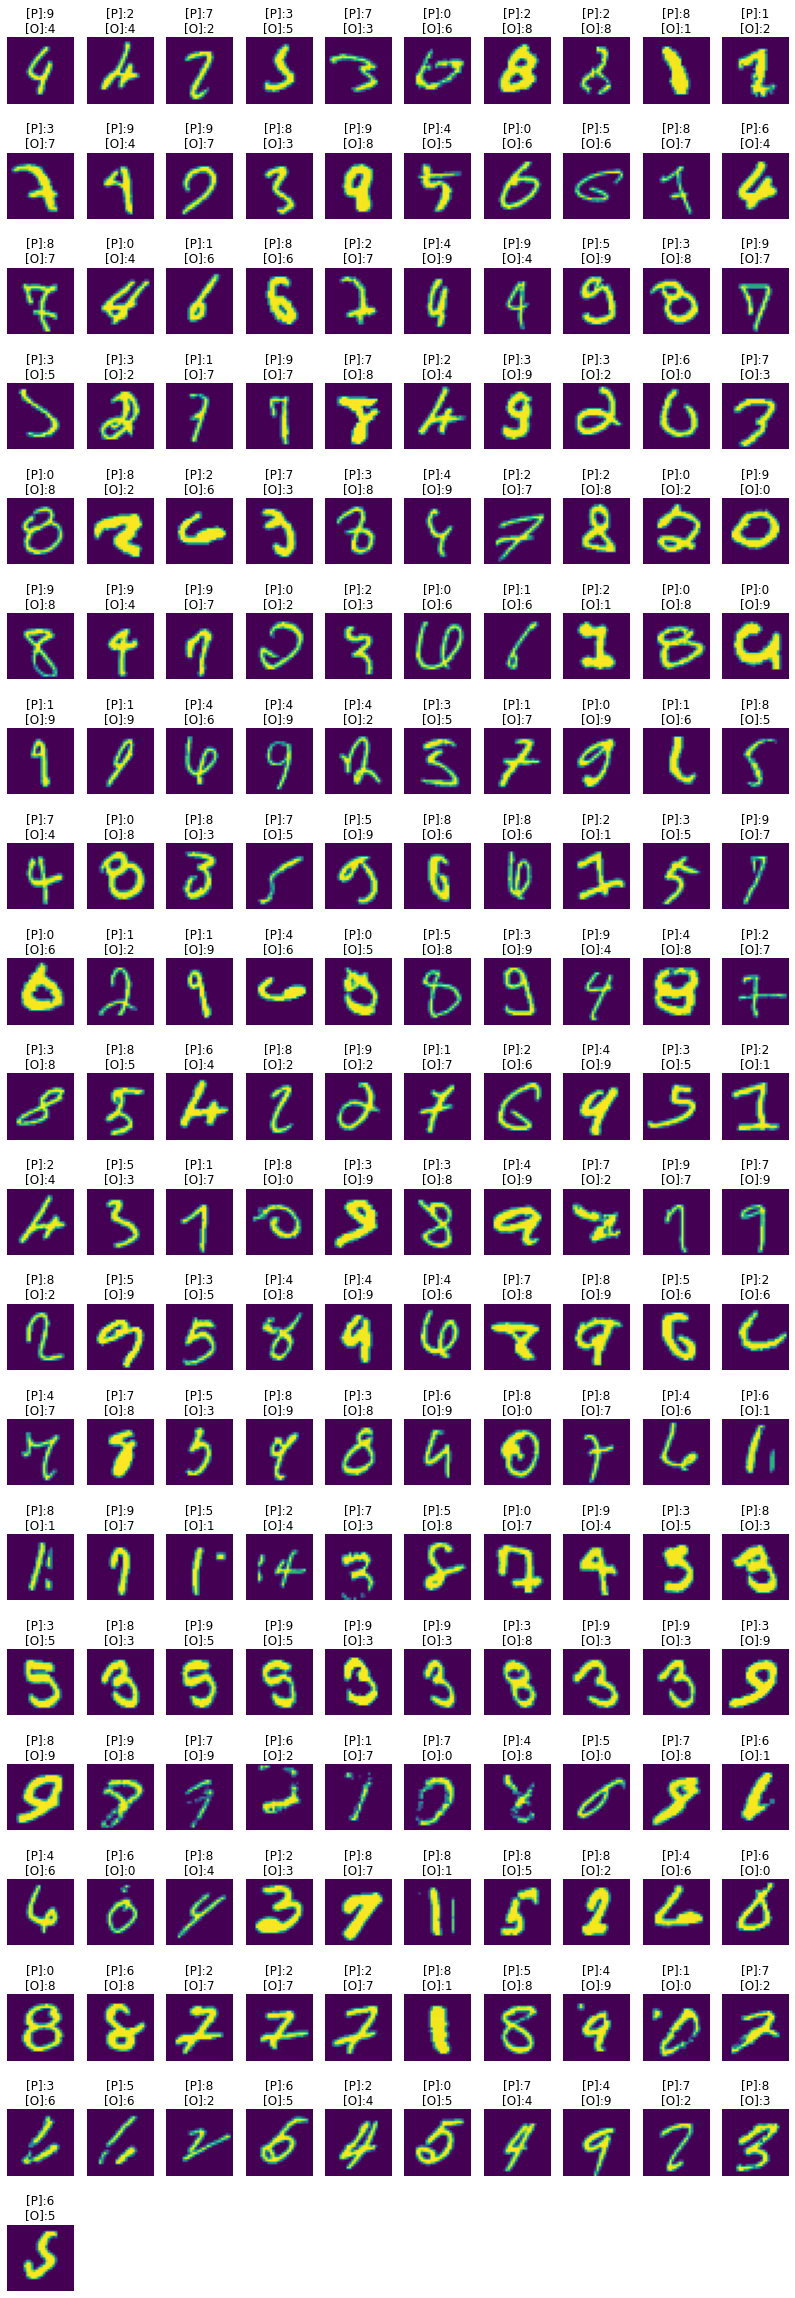

In [ ]:
# 列出預測錯誤的看一下
import numpy as np

# 預測不對的idx
idx = np.nonzero(pre != y_test)[0]

# 預測不對的圖的正確答案
pre_false_label = y_test[idx]

# 預測不對的圖的預測值
pre_false_pred = pre[idx]

# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))

width = 10
height = len(idx) // width + 1

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(pre_false_pred[i], pre_false_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])